# Projet 1: Classification d’images bruitées de chiffres (MNIST)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [3]:
#Load the data
train_images = np.load("./train_images.npy")
train_labels = np.load("./train_labels.npy")
test_images = np.load("./test_images.npy")
test_labels = np.load("./test_labels.npy")

In [4]:
#Analysis of the data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [5]:
#Show unique labels
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


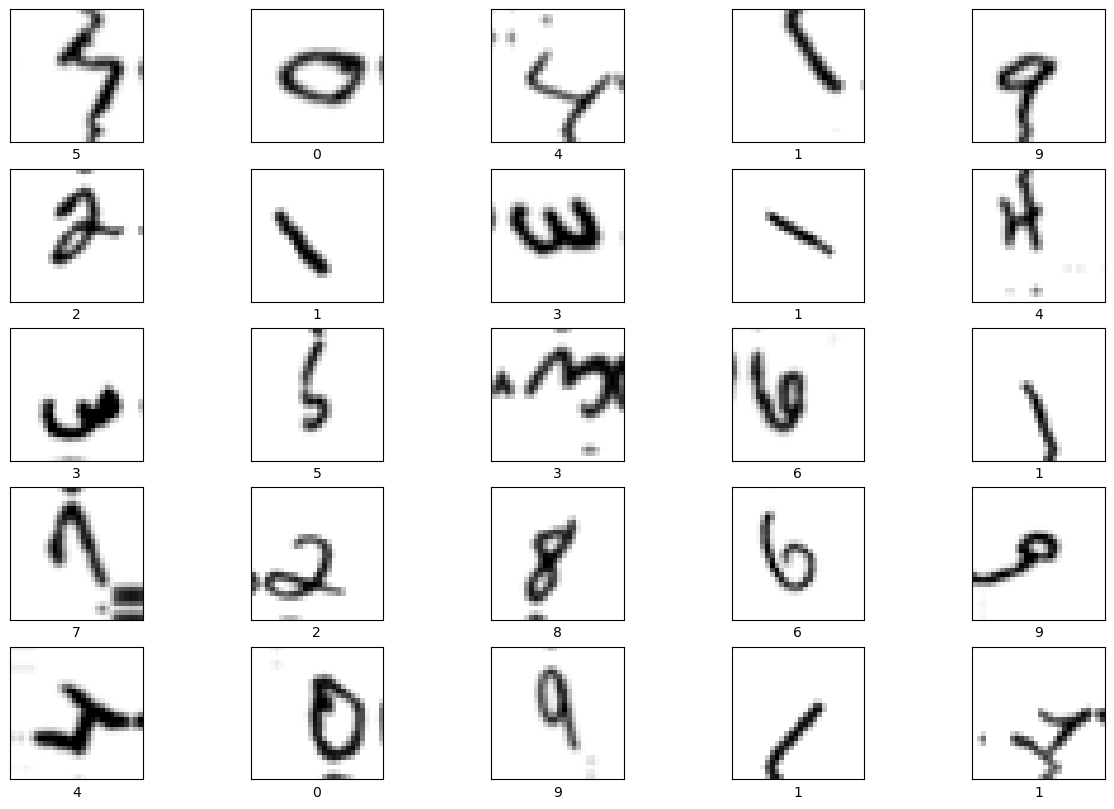

In [6]:
#Visualisation of the data
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

## Pre-formatting of the images

In [7]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

num_pixels = train_images.shape[1] * train_images.shape[2]#784
train_images = train_images.reshape(train_images.shape[0], num_pixels)
test_images = test_images.reshape(test_images.shape[0], num_pixels)

In [8]:
#normalization
#train_images = train_images / 255 #Déjà normalisées
test_images = test_images / 255

print(f"Train images min: {train_images.min()}, max: {train_images.max()}")
print(f"Test images min: {test_images.min()}, max: {test_images.max()}")

Train images min: 0.0, max: 1.0
Test images min: 0.0, max: 1.0


In [9]:
#One hot encoding the target labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
print(f"Train labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(train_labels[0])  # Doit être un vecteur avec une seule valeur égale à 1

Train labels shape: (60000, 10)
Test labels shape: (10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


train_label avant melange [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
train_label après melange [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Train images shape: (60000, 784)
Test images shape: (10000, 784)


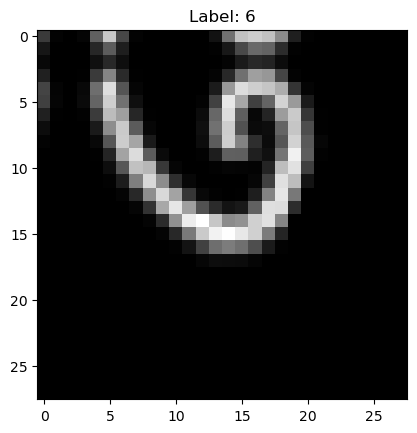

In [10]:
#shuffle the data
ns = train_images.shape[0]#number of examples
np.random.seed(71)
shuffle_index = np.random.permutation(ns)
train_images = train_images[shuffle_index,:]
print(f'train_label avant melange {train_labels[0]}')
train_labels = train_labels[shuffle_index,]
print(f'train_label après melange {train_labels[0]}')
print(f"Train images shape: {train_images.shape}")  # Doit être (60000, 784)
print(f"Test images shape: {test_images.shape}")    # Doit être (10000, 784)

plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {np.argmax(train_labels[0])}")  # Affiche la classe correspondante
plt.show()

## Multi-Layer Perceptron

### First model

In [50]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))#30% des neuronnes ne vont pas participer à l'apprentissage
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

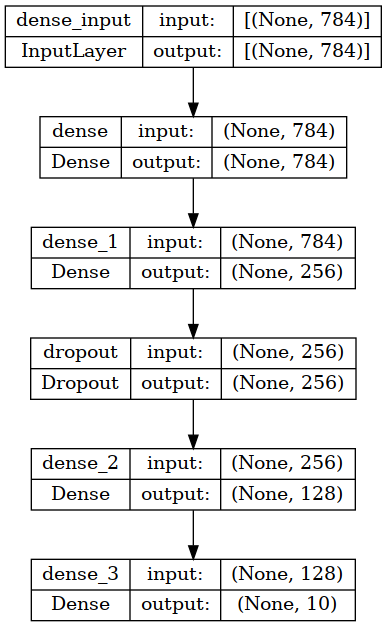

In [11]:
from IPython.display import Image
import pydot
from tensorflow.keras.utils import plot_model

# Générer le schéma du modèle et l'enregistrer dans un fichier
plot_model(model, to_file='model_MLP.png', show_shapes=True, show_layer_names=True)

# Afficher l'image dans le notebook
display(Image(filename='model_MLP.png'))

In [51]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

In [52]:
#fit the model
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=200, batch_size=100, verbose=1, callbacks=[callback])

Epoch 1/200
480/480 [==============================] - 20s 41ms/step - loss: 1.5803 - accuracy: 0.4503 - val_loss: 1.0865 - val_accuracy: 0.6403
Epoch 2/200
480/480 [==============================] - 19s 40ms/step - loss: 0.9370 - accuracy: 0.6891 - val_loss: 0.7539 - val_accuracy: 0.7590
Epoch 3/200
480/480 [==============================] - 19s 40ms/step - loss: 0.7077 - accuracy: 0.7720 - val_loss: 0.6868 - val_accuracy: 0.7801
Epoch 4/200
480/480 [==============================] - 18s 38ms/step - loss: 0.5773 - accuracy: 0.8147 - val_loss: 0.6201 - val_accuracy: 0.7991
Epoch 5/200
480/480 [==============================] - 21s 44ms/step - loss: 0.4884 - accuracy: 0.8426 - val_loss: 0.5565 - val_accuracy: 0.8278
Epoch 6/200
480/480 [==============================] - 22s 46ms/step - loss: 0.4211 - accuracy: 0.8625 - val_loss: 0.5413 - val_accuracy: 0.8334
Epoch 7/200
480/480 [==============================] - 26s 53ms/step - loss: 0.3666 - accuracy: 0.8792 - val_loss: 0.5536 - val_ac

#### Results

In [53]:
scores = model.evaluate(test_images, test_labels)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 5s 15ms/step - loss: 0.5163 - accuracy: 0.8580
Accuracy: 85.80%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


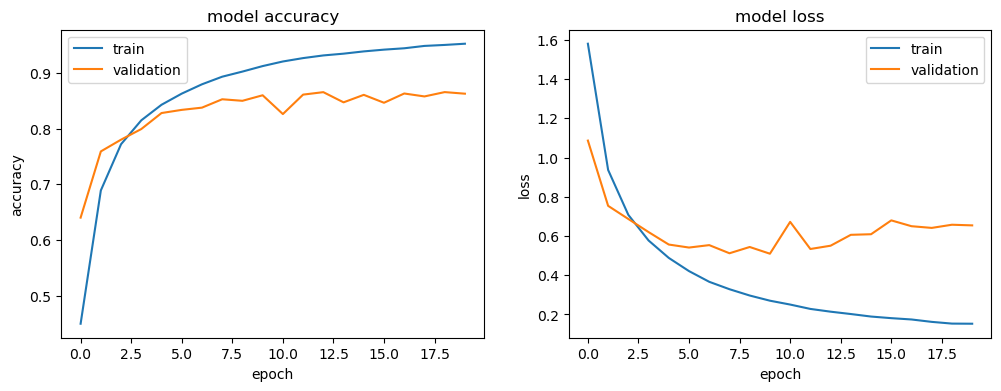

In [54]:
#plot the history
print(history.history.keys())
#Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')
#Loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper right')
plt.show()

313/313 [==============================] - 4s 14ms/step


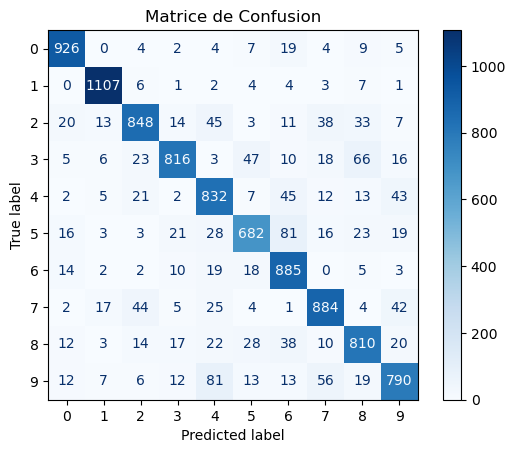

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.95      0.98      0.96      1135
           2       0.87      0.82      0.85      1032
           3       0.91      0.81      0.85      1010
           4       0.78      0.85      0.81       982
           5       0.84      0.76      0.80       892
           6       0.80      0.92      0.86       958
           7       0.85      0.86      0.85      1028
           8       0.82      0.83      0.83       974
           9       0.84      0.78      0.81      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [55]:
# Faire des prédictions sur les données de test
y_pred = model.predict(test_images)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes de test en classes
y_true = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
class_names = [str(i) for i in range(10)]  # Noms des classes de '0' à '9'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

print(classification_report(y_true, y_pred_classes))

### Second model

In [24]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))#30% des neuronnes ne vont pas participer à l'apprentissage
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

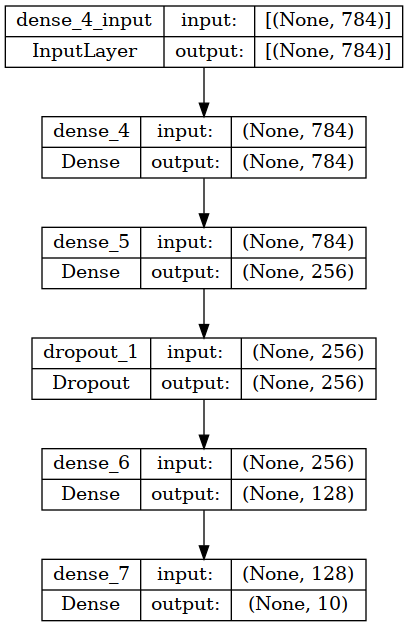

In [25]:
from IPython.display import Image
import pydot
from tensorflow.keras.utils import plot_model

# Générer le schéma du modèle et l'enregistrer dans un fichier
plot_model(model, to_file='model_MLP.png', show_shapes=True, show_layer_names=True)

# Afficher l'image dans le notebook
display(Image(filename='model_MLP.png'))

In [26]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

In [27]:
#fit the model
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=200, batch_size=100, verbose=1, callbacks=[callback])

Epoch 1/200
480/480 [==============================] - 19s 38ms/step - loss: 1.4761 - accuracy: 0.4885 - val_loss: 0.9472 - val_accuracy: 0.6888
Epoch 2/200
480/480 [==============================] - 19s 40ms/step - loss: 0.8435 - accuracy: 0.7252 - val_loss: 0.7182 - val_accuracy: 0.7705
Epoch 3/200
480/480 [==============================] - 20s 42ms/step - loss: 0.6343 - accuracy: 0.7935 - val_loss: 0.6177 - val_accuracy: 0.8048
Epoch 4/200
480/480 [==============================] - 17s 35ms/step - loss: 0.5166 - accuracy: 0.8309 - val_loss: 0.5536 - val_accuracy: 0.8257
Epoch 5/200
480/480 [==============================] - 11s 24ms/step - loss: 0.4385 - accuracy: 0.8571 - val_loss: 0.5613 - val_accuracy: 0.8240
Epoch 6/200
480/480 [==============================] - 15s 32ms/step - loss: 0.3718 - accuracy: 0.8756 - val_loss: 0.5234 - val_accuracy: 0.8361
Epoch 7/200
480/480 [==============================] - 9s 19ms/step - loss: 0.3270 - accuracy: 0.8893 - val_loss: 0.5115 - val_acc

#### Results

In [28]:
scores = model.evaluate(test_images, test_labels)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 8s 24ms/step - loss: 0.4858 - accuracy: 0.8574
Accuracy: 85.74%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


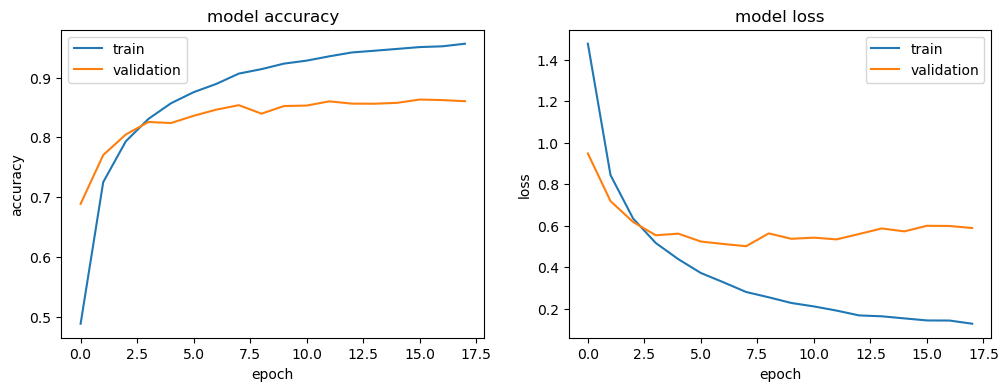

In [29]:
#plot the history
print(history.history.keys())
#Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')
#Loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper right')
plt.show()

313/313 [==============================] - 4s 14ms/step


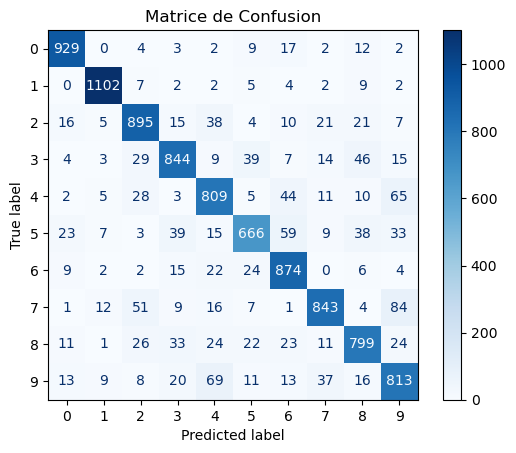

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       980
           1       0.96      0.97      0.97      1135
           2       0.85      0.87      0.86      1032
           3       0.86      0.84      0.85      1010
           4       0.80      0.82      0.81       982
           5       0.84      0.75      0.79       892
           6       0.83      0.91      0.87       958
           7       0.89      0.82      0.85      1028
           8       0.83      0.82      0.83       974
           9       0.78      0.81      0.79      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.86     10000



In [34]:
# Faire des prédictions sur les données de test
y_pred = model.predict(test_images)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes de test en classes
y_true = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
class_names = [str(i) for i in range(10)]  # Noms des classes de '0' à '9'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

print(classification_report(y_true, y_pred_classes))


### Third model

In [35]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))#30% des neuronnes ne vont pas participer à l'apprentissage
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

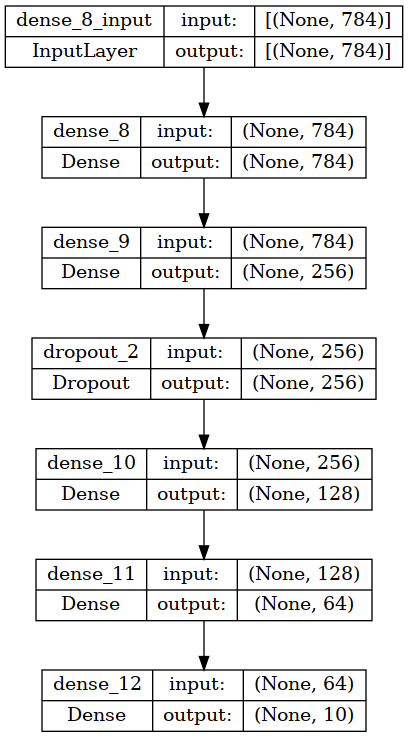

In [36]:
from IPython.display import Image
import pydot
from tensorflow.keras.utils import plot_model

# Générer le schéma du modèle et l'enregistrer dans un fichier
plot_model(model, to_file='model_MLP.png', show_shapes=True, show_layer_names=True)

# Afficher l'image dans le notebook
display(Image(filename='model_MLP.png'))

In [37]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

In [38]:
#fit the model
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=200, batch_size=100, verbose=1, callbacks=[callback])

Epoch 1/200
480/480 [==============================] - 23s 44ms/step - loss: 1.5259 - accuracy: 0.4667 - val_loss: 1.0547 - val_accuracy: 0.6430
Epoch 2/200
480/480 [==============================] - 21s 44ms/step - loss: 0.8893 - accuracy: 0.7049 - val_loss: 0.7583 - val_accuracy: 0.7542
Epoch 3/200
480/480 [==============================] - 23s 47ms/step - loss: 0.6796 - accuracy: 0.7798 - val_loss: 0.6637 - val_accuracy: 0.7855
Epoch 4/200
480/480 [==============================] - 23s 48ms/step - loss: 0.5516 - accuracy: 0.8225 - val_loss: 0.6140 - val_accuracy: 0.8025
Epoch 5/200
480/480 [==============================] - 22s 47ms/step - loss: 0.4711 - accuracy: 0.8465 - val_loss: 0.5567 - val_accuracy: 0.8235
Epoch 6/200
480/480 [==============================] - 24s 50ms/step - loss: 0.4048 - accuracy: 0.8672 - val_loss: 0.5518 - val_accuracy: 0.8287
Epoch 7/200
480/480 [==============================] - 19s 39ms/step - loss: 0.3554 - accuracy: 0.8820 - val_loss: 0.5274 - val_ac

#### Results

In [39]:
scores = model.evaluate(test_images, test_labels)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 4s 11ms/step - loss: 0.5168 - accuracy: 0.8565
Accuracy: 85.65%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


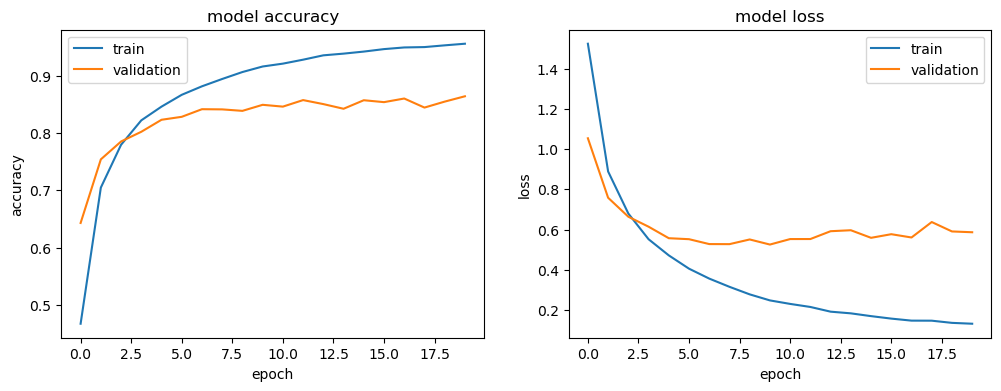

In [40]:
#plot the history
print(history.history.keys())
#Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')
#Loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper right')
plt.show()

313/313 [==============================] - 5s 17ms/step


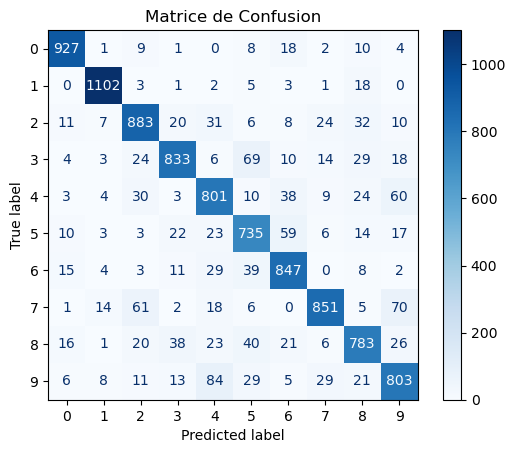

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       980
           1       0.96      0.97      0.97      1135
           2       0.84      0.86      0.85      1032
           3       0.88      0.82      0.85      1010
           4       0.79      0.82      0.80       982
           5       0.78      0.82      0.80       892
           6       0.84      0.88      0.86       958
           7       0.90      0.83      0.86      1028
           8       0.83      0.80      0.82       974
           9       0.80      0.80      0.80      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.86      0.86     10000



In [41]:
# Faire des prédictions sur les données de test
y_pred = model.predict(test_images)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes de test en classes
y_true = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
class_names = [str(i) for i in range(10)]  # Noms des classes de '0' à '9'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

print(classification_report(y_true, y_pred_classes))


### Fourth model

In [42]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))#30% des neuronnes ne vont pas participer à l'apprentissage
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

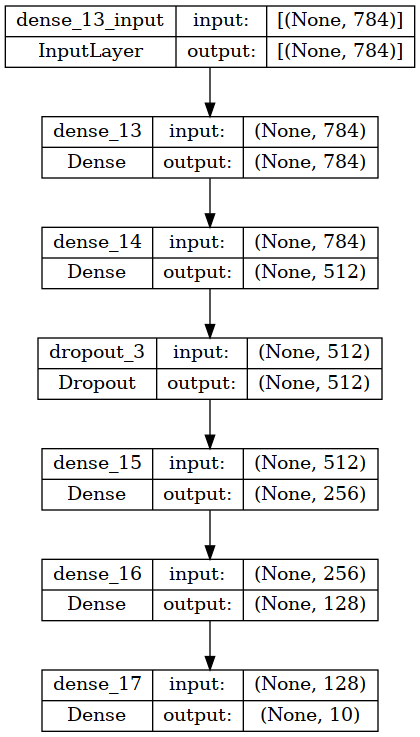

In [43]:
from IPython.display import Image
import pydot
from tensorflow.keras.utils import plot_model

# Générer le schéma du modèle et l'enregistrer dans un fichier
plot_model(model, to_file='model_MLP.png', show_shapes=True, show_layer_names=True)

# Afficher l'image dans le notebook
display(Image(filename='model_MLP.png'))

In [44]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

In [45]:
#fit the model
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=200, batch_size=100, verbose=1, callbacks=[callback])

Epoch 1/200
480/480 [==============================] - 29s 58ms/step - loss: 1.4078 - accuracy: 0.5117 - val_loss: 0.9304 - val_accuracy: 0.6917
Epoch 2/200
480/480 [==============================] - 26s 54ms/step - loss: 0.7907 - accuracy: 0.7385 - val_loss: 0.6938 - val_accuracy: 0.7732
Epoch 3/200
480/480 [==============================] - 27s 56ms/step - loss: 0.5953 - accuracy: 0.8060 - val_loss: 0.5776 - val_accuracy: 0.8118
Epoch 4/200
480/480 [==============================] - 27s 57ms/step - loss: 0.4801 - accuracy: 0.8425 - val_loss: 0.5722 - val_accuracy: 0.8174
Epoch 5/200
480/480 [==============================] - 26s 54ms/step - loss: 0.4015 - accuracy: 0.8667 - val_loss: 0.5209 - val_accuracy: 0.8371
Epoch 6/200
480/480 [==============================] - 30s 63ms/step - loss: 0.3440 - accuracy: 0.8865 - val_loss: 0.5205 - val_accuracy: 0.8446
Epoch 7/200
480/480 [==============================] - 27s 57ms/step - loss: 0.3041 - accuracy: 0.8994 - val_loss: 0.4813 - val_ac

#### Results

In [46]:
scores = model.evaluate(test_images, test_labels)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 4s 11ms/step - loss: 0.4598 - accuracy: 0.8647
Accuracy: 86.47%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


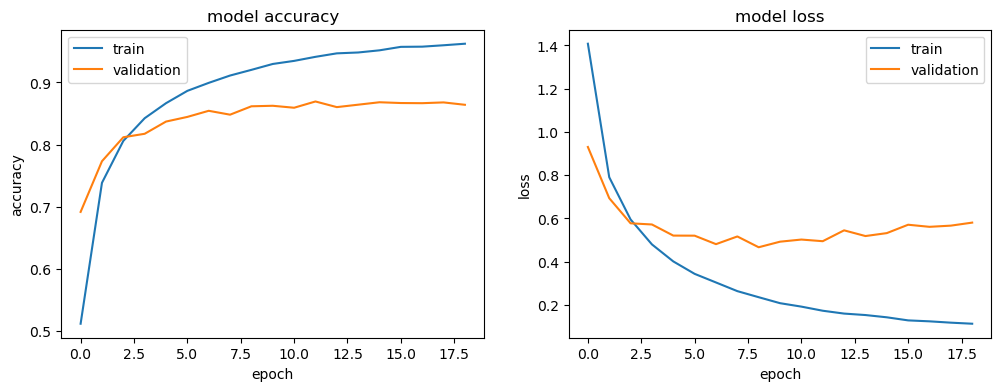

In [47]:
#plot the history
#Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')
#Loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper right')
plt.show()

313/313 [==============================] - 3s 10ms/step


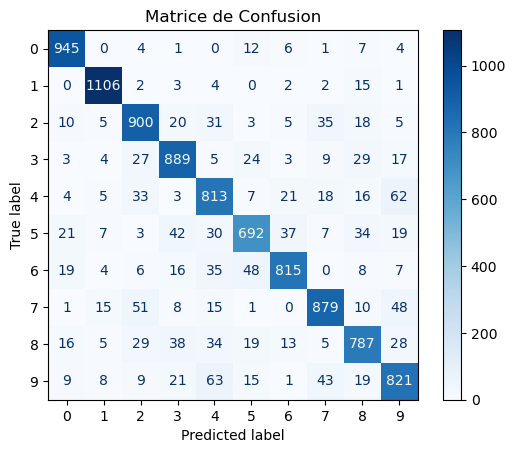

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.95      0.97      0.96      1135
           2       0.85      0.87      0.86      1032
           3       0.85      0.88      0.87      1010
           4       0.79      0.83      0.81       982
           5       0.84      0.78      0.81       892
           6       0.90      0.85      0.88       958
           7       0.88      0.86      0.87      1028
           8       0.83      0.81      0.82       974
           9       0.81      0.81      0.81      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [48]:
# Faire des prédictions sur les données de test
y_pred = model.predict(test_images)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes de test en classes
y_true = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
class_names = [str(i) for i in range(10)]  # Noms des classes de '0' à '9'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

print(classification_report(y_true, y_pred_classes))


In [11]:
#Cross validation
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# 1. Créer une fonction pour le modèle MLP
def create_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))#30% des neuronnes ne vont pas participer à l'apprentissage
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 2. Transformer le modèle Keras en KerasClassifier pour compatibilité avec scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=100, verbose=0)

# 3. Configurer la validation croisée KFold avec 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Appliquer la cross-validation et afficher les résultats
results = cross_val_score(model, train_images, train_labels, cv=kfold)
print("Cross-validation accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))


/tmp/ipykernel_26876/3705665738.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=100, verbose=0)
2024-09-24 20:06:50.333761: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Cross-validation accuracy: 87.40% (+/- 0.48%)


## Reseau à couche de convolution 2D

In [11]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Dropout, Flatten

In [12]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

### First model

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu', kernel_initializer='normal'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(128, activation='relu', kernel_initializer='normal'))
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)       

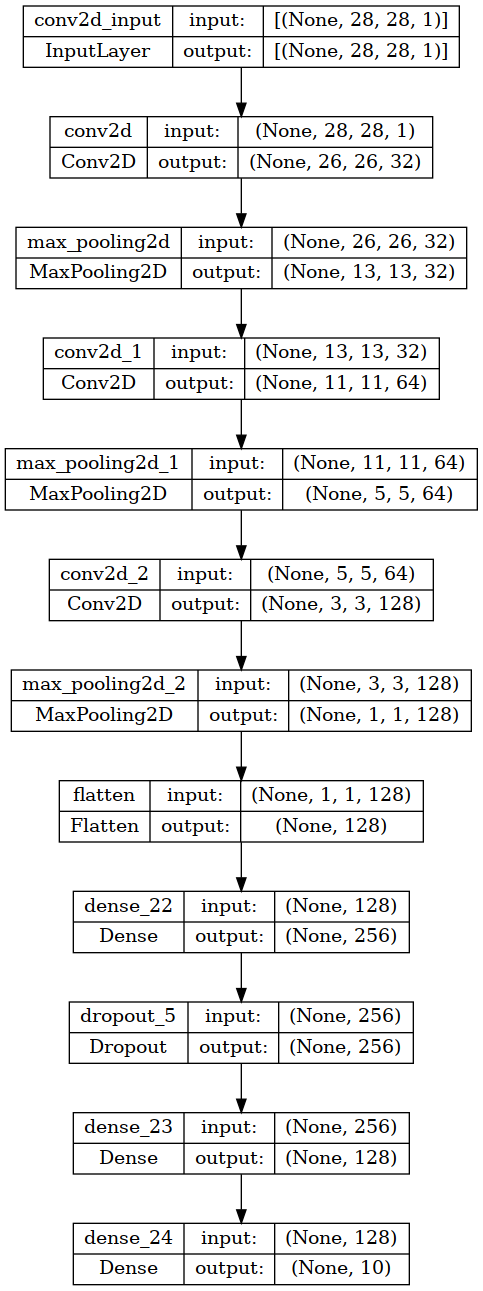

In [59]:
from IPython.display import Image
import pydot
from tensorflow.keras.utils import plot_model

# Générer le schéma du modèle et l'enregistrer dans un fichier
plot_model(model_cnn, to_file='model_MLP.png', show_shapes=True, show_layer_names=True)

# Afficher l'image dans le notebook
display(Image(filename='model_MLP.png'))

In [60]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')

In [61]:
history_cnn = model_cnn.fit(train_images, train_labels, validation_split=0.2, epochs=200, batch_size=100, verbose=1, callbacks=[callback])

Epoch 1/200
480/480 [==============================] - 56s 113ms/step - loss: 1.1588 - accuracy: 0.5951 - val_loss: 0.6772 - val_accuracy: 0.7748
Epoch 2/200
480/480 [==============================] - 55s 114ms/step - loss: 0.5563 - accuracy: 0.8202 - val_loss: 0.4298 - val_accuracy: 0.8636
Epoch 3/200
480/480 [==============================] - 56s 116ms/step - loss: 0.4105 - accuracy: 0.8682 - val_loss: 0.3672 - val_accuracy: 0.8826
Epoch 4/200
480/480 [==============================] - 60s 125ms/step - loss: 0.3272 - accuracy: 0.8952 - val_loss: 0.3277 - val_accuracy: 0.8953
Epoch 5/200
480/480 [==============================] - 56s 117ms/step - loss: 0.2857 - accuracy: 0.9073 - val_loss: 0.2865 - val_accuracy: 0.9100
Epoch 6/200
480/480 [==============================] - 49s 103ms/step - loss: 0.2448 - accuracy: 0.9191 - val_loss: 0.3153 - val_accuracy: 0.9034
Epoch 7/200
480/480 [==============================] - 51s 106ms/step - loss: 0.2195 - accuracy: 0.9279 - val_loss: 0.3124 -

### Results

In [62]:
scores_cnn = model_cnn.evaluate(test_images, test_labels)
print("Accuracy: %.2f%%" % (scores_cnn[1]*100))

313/313 [==============================] - 6s 17ms/step - loss: 0.2981 - accuracy: 0.9258
Accuracy: 92.58%


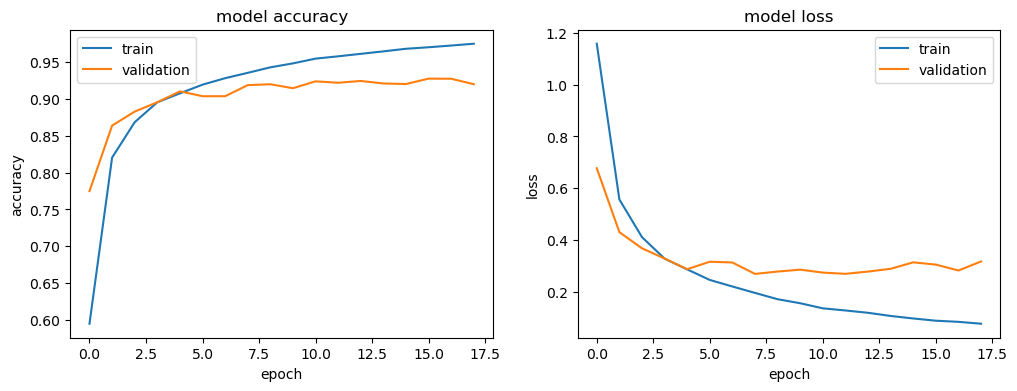

In [63]:
#plot the history
#Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history_cnn.history['accuracy'])
ax[0].plot(history_cnn.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')
#Loss
ax[1].plot(history_cnn.history['loss'])
ax[1].plot(history_cnn.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper right')
plt.show()

313/313 [==============================] - 6s 20ms/step


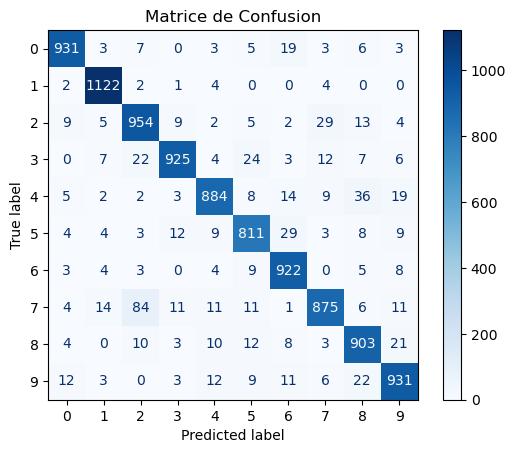

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       980
           1       0.96      0.99      0.98      1135
           2       0.88      0.92      0.90      1032
           3       0.96      0.92      0.94      1010
           4       0.94      0.90      0.92       982
           5       0.91      0.91      0.91       892
           6       0.91      0.96      0.94       958
           7       0.93      0.85      0.89      1028
           8       0.90      0.93      0.91       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [64]:
# Faire des prédictions sur les données de test
y_pred = model_cnn.predict(test_images)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes de test en classes
y_true = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
class_names = [str(i) for i in range(10)]  # Noms des classes de '0' à '9'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

print(classification_report(y_true, y_pred_classes))


### Second model

In [81]:
model_lenet = Sequential()
model_lenet.add(Conv2D(6, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model_lenet.add(MaxPooling2D((2, 2)))
model_lenet.add(Conv2D(16, (5, 5), activation='relu'))
model_lenet.add(MaxPooling2D((2, 2)))
model_lenet.add(Flatten())
model_lenet.add(Dense(120, activation='relu'))
model_lenet.add(Dense(84, activation='relu'))
model_lenet.add(Dense(10, activation='softmax'))
model_lenet.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model_lenet.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 120)             

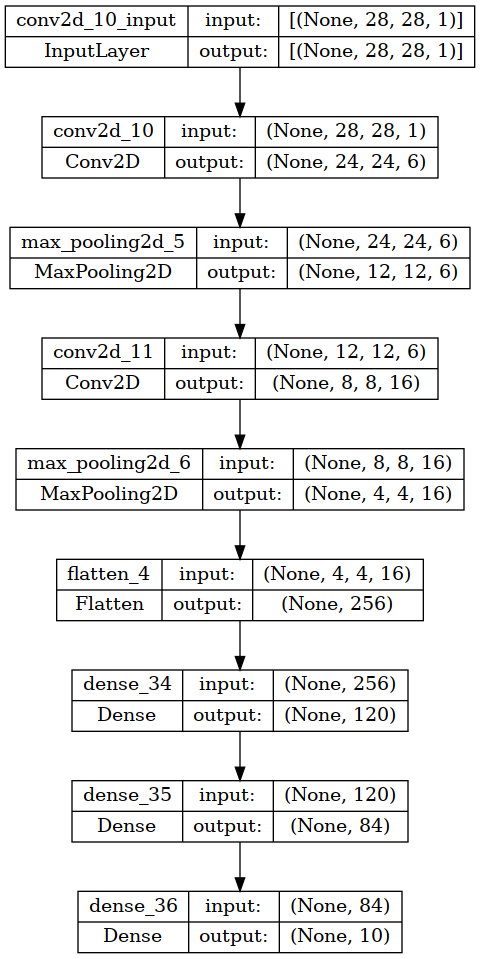

In [82]:
from IPython.display import Image
import pydot
from tensorflow.keras.utils import plot_model

# Générer le schéma du modèle et l'enregistrer dans un fichier
plot_model(model_lenet, to_file='model_MLP.png', show_shapes=True, show_layer_names=True)

# Afficher l'image dans le notebook
display(Image(filename='model_MLP.png'))

In [83]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')

In [84]:
history_lenet = model_lenet.fit(train_images, train_labels, validation_split=0.2, epochs=200, batch_size=100, verbose=1, callbacks=[callback])

Epoch 1/200
480/480 [==============================] - 47s 94ms/step - loss: 1.3263 - accuracy: 0.5515 - val_loss: 0.8418 - val_accuracy: 0.7297
Epoch 2/200
480/480 [==============================] - 49s 103ms/step - loss: 0.6398 - accuracy: 0.7984 - val_loss: 0.5350 - val_accuracy: 0.8397
Epoch 3/200
480/480 [==============================] - 47s 97ms/step - loss: 0.4702 - accuracy: 0.8524 - val_loss: 0.4249 - val_accuracy: 0.8702
Epoch 4/200
480/480 [==============================] - 43s 89ms/step - loss: 0.3757 - accuracy: 0.8829 - val_loss: 0.3931 - val_accuracy: 0.8767
Epoch 5/200
480/480 [==============================] - 41s 86ms/step - loss: 0.3212 - accuracy: 0.8988 - val_loss: 0.3336 - val_accuracy: 0.8984
Epoch 6/200
480/480 [==============================] - 50s 104ms/step - loss: 0.2814 - accuracy: 0.9112 - val_loss: 0.3428 - val_accuracy: 0.8913
Epoch 7/200
480/480 [==============================] - 33s 70ms/step - loss: 0.2544 - accuracy: 0.9191 - val_loss: 0.2982 - val_

### Results

In [87]:
scores_lenet = model_lenet.evaluate(test_images, test_labels)
print("Accuracy: %.2f%%" % (scores_lenet[1]*100))

313/313 [==============================] - 4s 12ms/step - loss: 0.3172 - accuracy: 0.9316
Accuracy: 93.16%


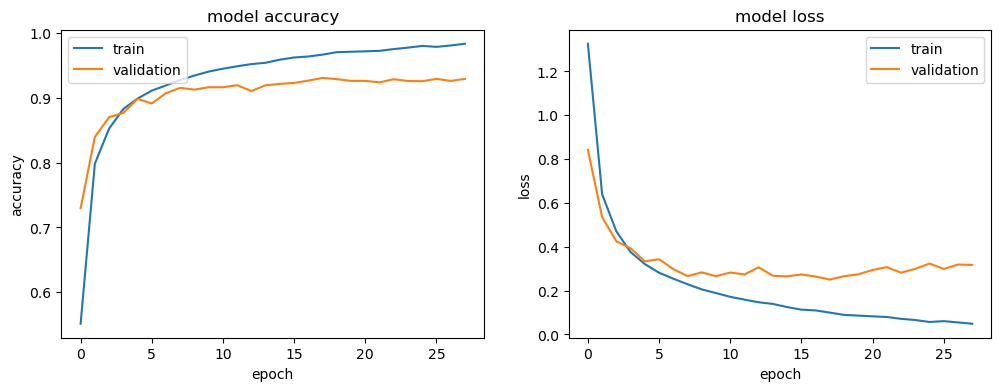

In [88]:
#plot the history
#Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history_lenet.history['accuracy'])
ax[0].plot(history_lenet.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')
#Loss
ax[1].plot(history_lenet.history['loss'])
ax[1].plot(history_lenet.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper right')
plt.show()

313/313 [==============================] - 3s 9ms/step


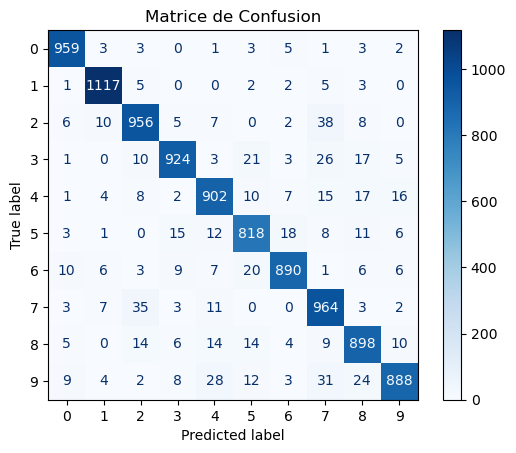

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.92      0.93      0.92      1032
           3       0.95      0.91      0.93      1010
           4       0.92      0.92      0.92       982
           5       0.91      0.92      0.91       892
           6       0.95      0.93      0.94       958
           7       0.88      0.94      0.91      1028
           8       0.91      0.92      0.91       974
           9       0.95      0.88      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [89]:
# Faire des prédictions sur les données de test
y_pred = model_lenet.predict(test_images)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes de test en classes
y_true = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
class_names = [str(i) for i in range(10)]  # Noms des classes de '0' à '9'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

print(classification_report(y_true, y_pred_classes))


## Third model

In [93]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))#30% des neuronnes ne vont pas participer à l'apprentissage
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model_cnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_41 (Dense)            (None, 512)               2769408   
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                     

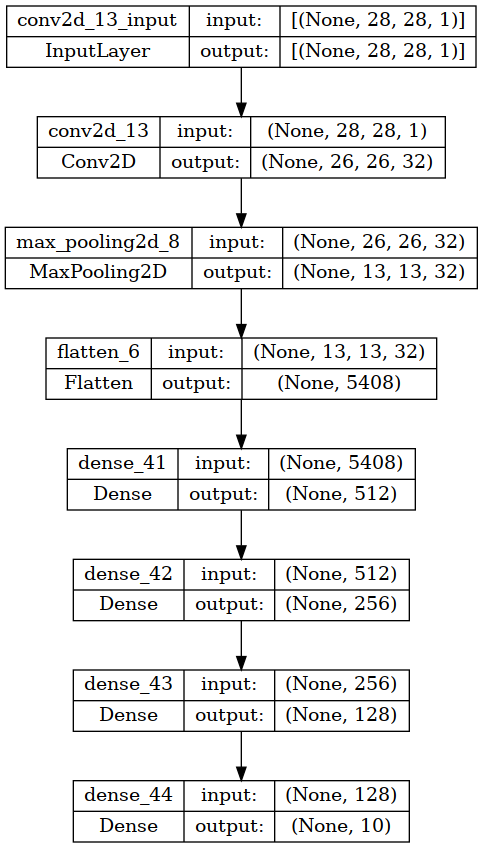

In [94]:
from IPython.display import Image
import pydot
from tensorflow.keras.utils import plot_model

# Générer le schéma du modèle et l'enregistrer dans un fichier
plot_model(model_cnn, to_file='model_MLP.png', show_shapes=True, show_layer_names=True)

# Afficher l'image dans le notebook
display(Image(filename='model_MLP.png'))

In [95]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')

In [96]:
history_cnn = model_cnn.fit(train_images, train_labels, validation_split=0.2, epochs=200, batch_size=100, verbose=1, callbacks=[callback])

Epoch 1/200
480/480 [==============================] - 62s 126ms/step - loss: 1.1076 - accuracy: 0.6226 - val_loss: 0.6432 - val_accuracy: 0.7944
Epoch 2/200
480/480 [==============================] - 64s 133ms/step - loss: 0.4454 - accuracy: 0.8565 - val_loss: 0.4422 - val_accuracy: 0.8587
Epoch 3/200
480/480 [==============================] - 65s 136ms/step - loss: 0.2632 - accuracy: 0.9154 - val_loss: 0.3399 - val_accuracy: 0.8892
Epoch 4/200
480/480 [==============================] - 64s 134ms/step - loss: 0.1644 - accuracy: 0.9461 - val_loss: 0.3223 - val_accuracy: 0.9018
Epoch 5/200
480/480 [==============================] - 66s 137ms/step - loss: 0.1088 - accuracy: 0.9632 - val_loss: 0.3364 - val_accuracy: 0.9043
Epoch 6/200
480/480 [==============================] - 65s 136ms/step - loss: 0.0790 - accuracy: 0.9739 - val_loss: 0.3545 - val_accuracy: 0.9062
Epoch 7/200
480/480 [==============================] - 67s 139ms/step - loss: 0.0663 - accuracy: 0.9773 - val_loss: 0.3622 -

### Results

In [97]:
scores_cnn = model_cnn.evaluate(test_images, test_labels)
print("Accuracy: %.2f%%" % (scores_cnn[1]*100))

313/313 [==============================] - 6s 17ms/step - loss: 0.4820 - accuracy: 0.9066
Accuracy: 90.66%


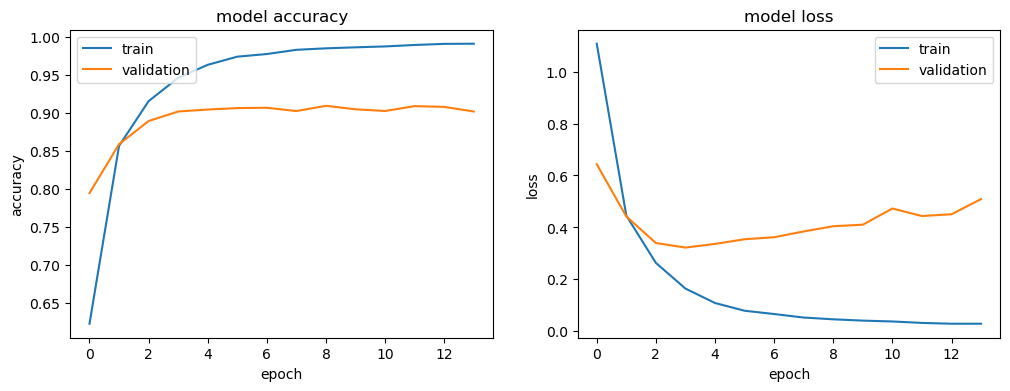

In [98]:
#plot the history
#Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history_cnn.history['accuracy'])
ax[0].plot(history_cnn.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')
#Loss
ax[1].plot(history_cnn.history['loss'])
ax[1].plot(history_cnn.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper right')
plt.show()

313/313 [==============================] - 6s 19ms/step


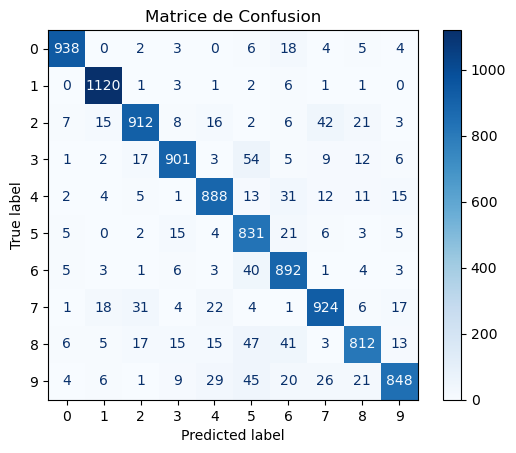

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       980
           1       0.95      0.99      0.97      1135
           2       0.92      0.88      0.90      1032
           3       0.93      0.89      0.91      1010
           4       0.91      0.90      0.90       982
           5       0.80      0.93      0.86       892
           6       0.86      0.93      0.89       958
           7       0.90      0.90      0.90      1028
           8       0.91      0.83      0.87       974
           9       0.93      0.84      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [99]:
# Faire des prédictions sur les données de test
y_pred = model_cnn.predict(test_images)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes de test en classes
y_true = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
class_names = [str(i) for i in range(10)]  # Noms des classes de '0' à '9'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

print(classification_report(y_true, y_pred_classes))


## Fourth model

In [101]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu', kernel_initializer='normal'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(128, activation='relu', kernel_initializer='normal'))
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model_cnn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 128)      

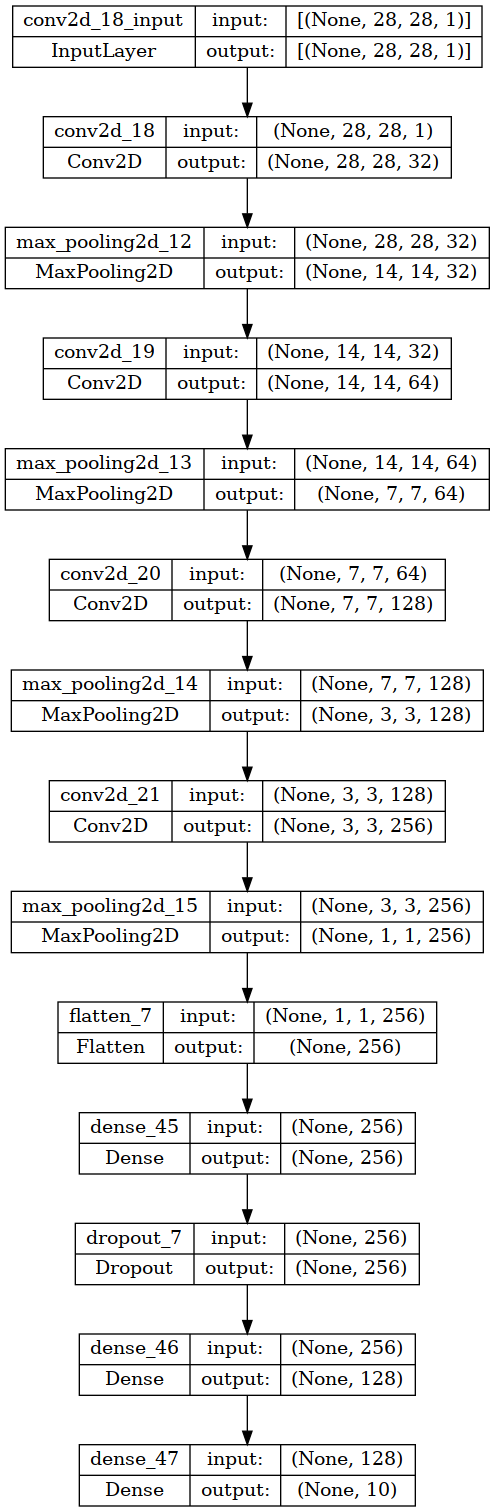

In [102]:
from IPython.display import Image
import pydot
from tensorflow.keras.utils import plot_model

# Générer le schéma du modèle et l'enregistrer dans un fichier
plot_model(model_cnn, to_file='model_MLP.png', show_shapes=True, show_layer_names=True)

# Afficher l'image dans le notebook
display(Image(filename='model_MLP.png'))

In [103]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')

In [104]:
history_cnn = model_cnn.fit(train_images, train_labels, validation_split=0.2, epochs=200, batch_size=100, verbose=1, callbacks=[callback])

Epoch 1/200
480/480 [==============================] - 102s 208ms/step - loss: 0.8731 - accuracy: 0.7019 - val_loss: 0.2861 - val_accuracy: 0.9118
Epoch 2/200
480/480 [==============================] - 97s 202ms/step - loss: 0.2317 - accuracy: 0.9291 - val_loss: 0.1791 - val_accuracy: 0.9452
Epoch 3/200
480/480 [==============================] - 107s 223ms/step - loss: 0.1572 - accuracy: 0.9509 - val_loss: 0.1707 - val_accuracy: 0.9486
Epoch 4/200
480/480 [==============================] - 105s 219ms/step - loss: 0.1184 - accuracy: 0.9638 - val_loss: 0.1385 - val_accuracy: 0.9588
Epoch 5/200
480/480 [==============================] - 111s 230ms/step - loss: 0.0926 - accuracy: 0.9713 - val_loss: 0.1279 - val_accuracy: 0.9628
Epoch 6/200
480/480 [==============================] - 112s 234ms/step - loss: 0.0711 - accuracy: 0.9779 - val_loss: 0.1393 - val_accuracy: 0.9602
Epoch 7/200
480/480 [==============================] - 114s 237ms/step - loss: 0.0641 - accuracy: 0.9794 - val_loss: 0.

### Results

In [105]:
scores_cnn = model_cnn.evaluate(test_images, test_labels)
print("Accuracy: %.2f%%" % (scores_cnn[1]*100))

313/313 [==============================] - 10s 30ms/step - loss: 0.1647 - accuracy: 0.9666
Accuracy: 96.66%


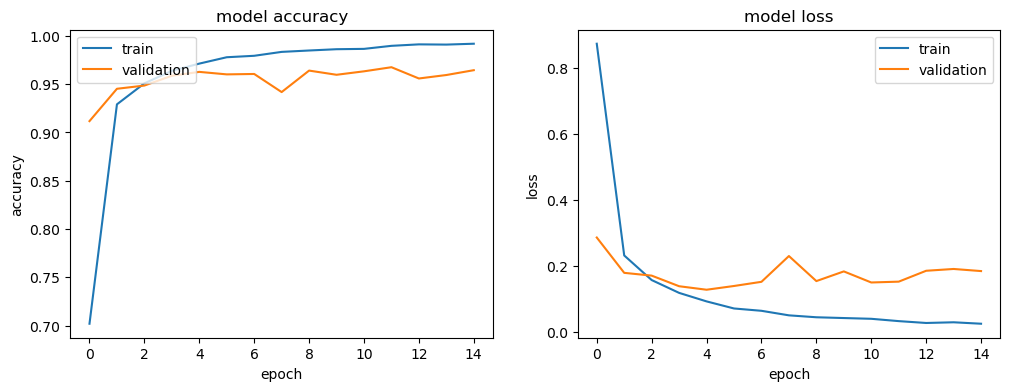

In [106]:
#plot the history
#Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history_cnn.history['accuracy'])
ax[0].plot(history_cnn.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')
#Loss
ax[1].plot(history_cnn.history['loss'])
ax[1].plot(history_cnn.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper right')
plt.show()

313/313 [==============================] - 9s 28ms/step


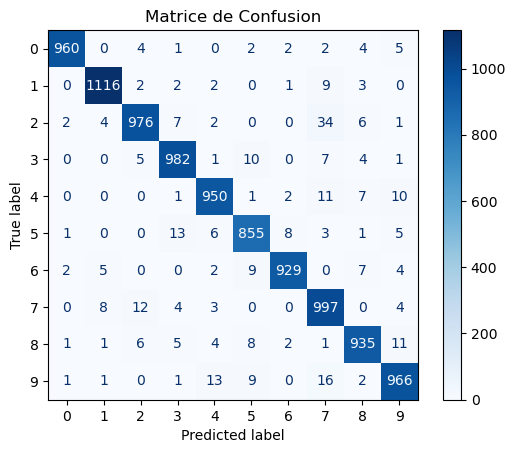

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.92      0.97      0.95      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [107]:
# Faire des prédictions sur les données de test
y_pred = model_cnn.predict(test_images)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes de test en classes
y_true = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
class_names = [str(i) for i in range(10)]  # Noms des classes de '0' à '9'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

print(classification_report(y_true, y_pred_classes))


## 5th model

In [113]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation='relu', kernel_initializer='normal'))  # Augmenté de 256 à 512
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(256, activation='relu', kernel_initializer='normal'))  # Augmenté de 128 à 256
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model_cnn.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 3, 3, 128)      

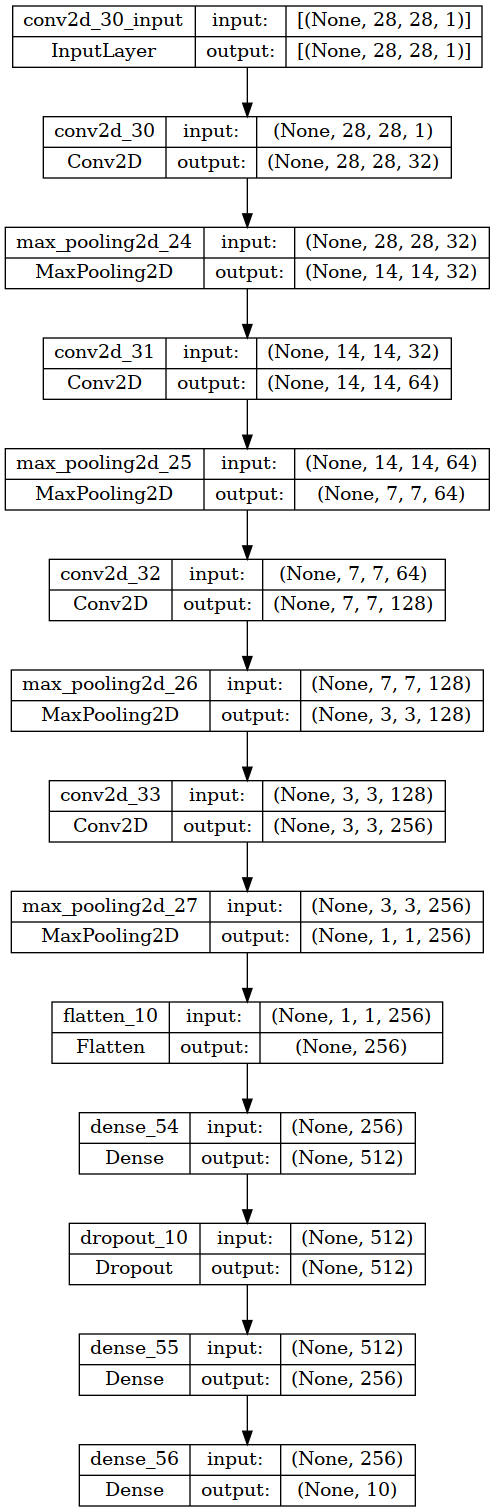

In [114]:
from IPython.display import Image
import pydot
from tensorflow.keras.utils import plot_model

# Générer le schéma du modèle et l'enregistrer dans un fichier
plot_model(model_cnn, to_file='model_MLP.png', show_shapes=True, show_layer_names=True)

# Afficher l'image dans le notebook
display(Image(filename='model_MLP.png'))

In [115]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')

In [116]:
history_cnn = model_cnn.fit(train_images, train_labels, validation_split=0.2, epochs=200, batch_size=100, verbose=1, callbacks=[callback])

Epoch 1/200
480/480 [==============================] - 121s 248ms/step - loss: 0.7455 - accuracy: 0.7489 - val_loss: 0.2425 - val_accuracy: 0.9202
Epoch 2/200
480/480 [==============================] - 74s 154ms/step - loss: 0.2152 - accuracy: 0.9335 - val_loss: 0.1736 - val_accuracy: 0.9439
Epoch 3/200
480/480 [==============================] - 57s 119ms/step - loss: 0.1446 - accuracy: 0.9549 - val_loss: 0.1607 - val_accuracy: 0.9488
Epoch 4/200
480/480 [==============================] - 58s 121ms/step - loss: 0.1093 - accuracy: 0.9644 - val_loss: 0.1535 - val_accuracy: 0.9551
Epoch 5/200
480/480 [==============================] - 57s 118ms/step - loss: 0.0822 - accuracy: 0.9731 - val_loss: 0.1359 - val_accuracy: 0.9586
Epoch 6/200
480/480 [==============================] - 59s 122ms/step - loss: 0.0686 - accuracy: 0.9778 - val_loss: 0.1619 - val_accuracy: 0.9578
Epoch 7/200
480/480 [==============================] - 58s 120ms/step - loss: 0.0593 - accuracy: 0.9807 - val_loss: 0.1494 

### Results

In [120]:
scores_cnn = model_cnn.evaluate(test_images, test_labels)
print("Accuracy: %.2f%%" % (scores_cnn[1]*100))

313/313 [==============================] - 13s 39ms/step - loss: 0.1569 - accuracy: 0.9646
Accuracy: 96.46%


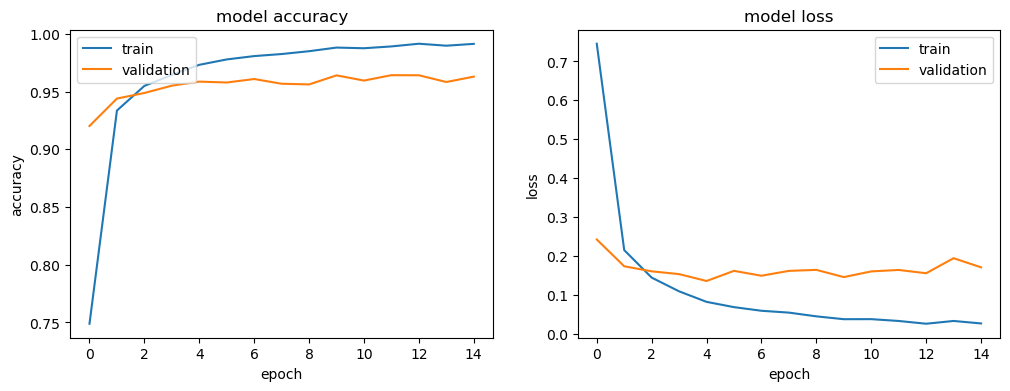

In [121]:
#plot the history
#Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history_cnn.history['accuracy'])
ax[0].plot(history_cnn.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')
#Loss
ax[1].plot(history_cnn.history['loss'])
ax[1].plot(history_cnn.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper right')
plt.show()

313/313 [==============================] - 9s 30ms/step


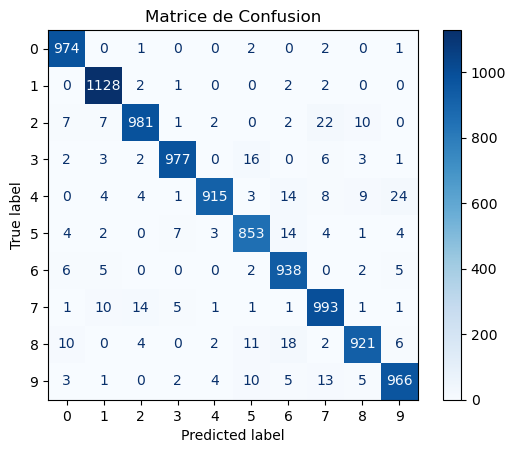

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.98      0.97      0.98      1010
           4       0.99      0.93      0.96       982
           5       0.95      0.96      0.95       892
           6       0.94      0.98      0.96       958
           7       0.94      0.97      0.95      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [122]:
# Faire des prédictions sur les données de test
y_pred = model_cnn.predict(test_images)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes de test en classes
y_true = np.argmax(test_labels, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
class_names = [str(i) for i in range(10)]  # Noms des classes de '0' à '9'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

print(classification_report(y_true, y_pred_classes))


In [13]:
#Cross validation
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# 1. Créer une fonction pour le modèle CNN
def create_model_cnn():
    model_cnn = Sequential()
    model_cnn.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model_cnn.add(MaxPooling2D((2, 2)))
    model_cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model_cnn.add(MaxPooling2D((2, 2)))
    model_cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model_cnn.add(MaxPooling2D((2, 2)))
    model_cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model_cnn.add(MaxPooling2D((2, 2)))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(512, activation='relu', kernel_initializer='normal'))  # Augmenté de 256 à 512
    model_cnn.add(Dropout(0.3))
    model_cnn.add(Dense(256, activation='relu', kernel_initializer='normal'))  # Augmenté de 128 à 256
    model_cnn.add(Dense(10, activation='softmax'))
    model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model_cnn

# 2. Transformer le modèle Keras en KerasClassifier pour compatibilité avec scikit-learn
model_cnn = KerasClassifier(build_fn=create_model_cnn, epochs=50, batch_size=100, verbose=0)

# 3. Configurer la validation croisée KFold avec 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Appliquer la cross-validation et afficher les résultats
results = cross_val_score(model_cnn, train_images, train_labels, cv=kfold)
print("Cross-validation accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))


/tmp/ipykernel_37115/4058744719.py:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_cnn = KerasClassifier(build_fn=create_model_cnn, epochs=50, batch_size=100, verbose=0)
2024-09-24 21:28:43.289848: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Cross-validation accuracy: 96.62% (+/- 0.25%)
